<a href="https://colab.research.google.com/github/JasonDhanota/TinyML/blob/main/FundamentalsOfTinyML/2-4-11-AssignmentQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.

In [1]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Do not change this code
!pip install --upgrade --no-cache-dir gdown

In [3]:
# Do not change this code
!gdown "https://storage.googleapis.com/learning-datasets/beans/train.zip" -O /tmp/train.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/validation.zip" -O /tmp/validation.zip
!gdown "https://storage.googleapis.com/learning-datasets/beans/test.zip" -O /tmp/test.zip

Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/train.zip
To: /tmp/train.zip
100% 144M/144M [00:03<00:00, 37.4MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/validation.zip
To: /tmp/validation.zip
100% 18.5M/18.5M [00:01<00:00, 16.8MB/s]
Downloading...
From: https://storage.googleapis.com/learning-datasets/beans/test.zip
To: /tmp/test.zip
100% 17.7M/17.7M [00:00<00:00, 24.7MB/s]


In [4]:
# Do not change this code
import os
import zipfile

local_zip = '/tmp/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
local_zip = '/tmp/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/test')
zip_ref.close()

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,

    rotation_range=40,

    width_shift_range=0.2,

    height_shift_range=0.2,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True,

    fill_mode='nearest'

)

# You don't want to validate with augmented images
# Just use the regular dataset
validation_datagen = ImageDataGenerator(rescale=1./255)

TRAIN_DIRECTORY_LOCATION = '/tmp/train'
VAL_DIRECTORY_LOCATION = '/tmp/validation'
TARGET_SIZE = (224,224)
# categorical is chosen since their is more than
# 2 classes, 3 classes for classifying the beans
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,
    batch_size = 128,
    class_mode = CLASS_MODE
)

Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.


Now its your turn to define a model to learn this data.

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [15]:
import tensorflow as tf

model = tf.keras.models.Sequential([
   # Find the features with Convolutions and Pooling
   # start with higher level features first (16) and work
   # way down to the finer features (128)
   tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),

   # Flatten the results to feed into a DNN
   tf.keras.layers.Flatten(),

   # 512 neuron hidden layer
   tf.keras.layers.Dense(512, activation='relu'),
   # 3 output neurons for each class
   tf.keras.layers.Dense(3, activation='softmax')

])

# This will print a summary of your model when you're done!
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     9,437,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,536,675 (36.38 MB)

 Trainable params: 9,536,675 (36.38 MB)

 Non-trainable params: 0 (0.00 B)

Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [16]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam' # typically used with categorical crossentropy

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3411 - loss: 1.5668

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3427 - loss: 1.5484 - val_accuracy: 0.3308 - val_loss: 1.0926
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3571 - loss: 1.0916 - val_accuracy: 0.5714 - val_loss: 1.0608
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5152 - loss: 1.0407 - val_accuracy: 0.5113 - val_loss: 1.0085
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5475 - loss: 0.9757 - val_accuracy: 0.4962 - val_loss: 0.9356
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5732 - loss: 0.9196 - val_accuracy: 0.5865 - val_loss: 0.8485
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5485 - loss: 0.9400 - val_accuracy: 0.5940 - val_loss: 0.8617
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.6336 - loss: 0.8545 - val_accuracy: 0.6617 - val_loss: 0.8097
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5753 - loss: 0.9158 - val_accuracy: 0.6165 - val_loss: 0.8082
Epoch 9/20
9/9 ━━━━

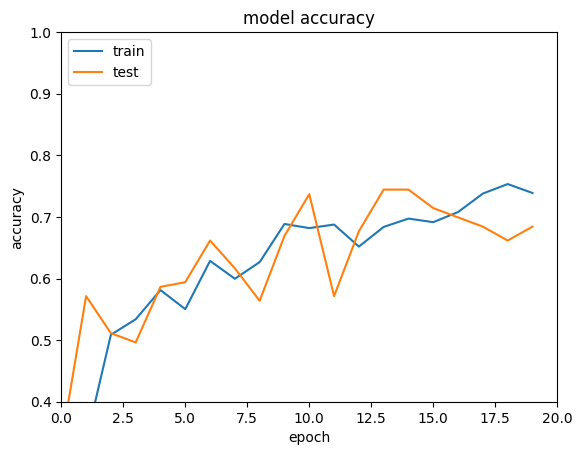

In [17]:
NUM_EPOCHS = 20 #YOUR CODE HERE#

history = model.fit(
      train_generator,
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()